## Sampling in Python Using Philippines Household Income Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
data = pd.read_csv('Datasets/Family Income and Expenditure.csv')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

None

We will be working with the `Region` column. 

Region
 ARMM                        2248
CAR                          1725
Caraga                       1782
I - Ilocos Region            2348
II - Cagayan Valley          2219
III - Central Luzon          3237
IVA - CALABARZON             4162
IVB - MIMAROPA               1249
IX - Zasmboanga Peninsula    1788
NCR                          4130
V - Bicol Region             2472
VI - Western Visayas         2851
VII - Central Visayas        2541
VIII - Eastern Visayas       2337
X - Northern Mindanao        1887
XI - Davao Region            2446
XII - SOCCSKSARGEN           2122
Name: Region, dtype: int64

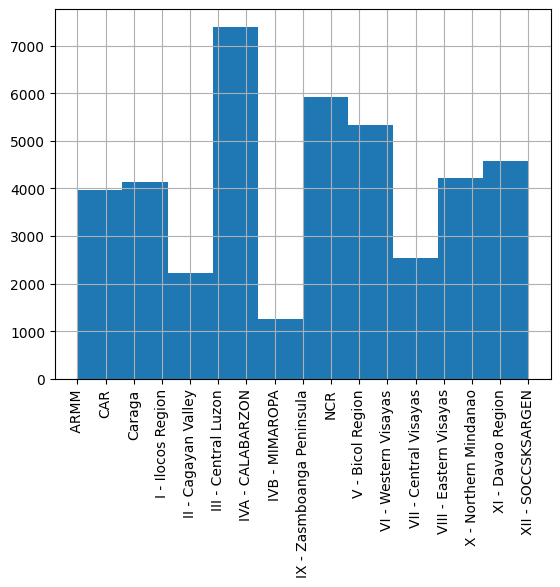

In [15]:
# Check for distribution of data
display(data.groupby('Region')['Region'].count())
data.sort_values(by='Region')['Region'].hist()
plt.xticks(rotation=90)
plt.show()

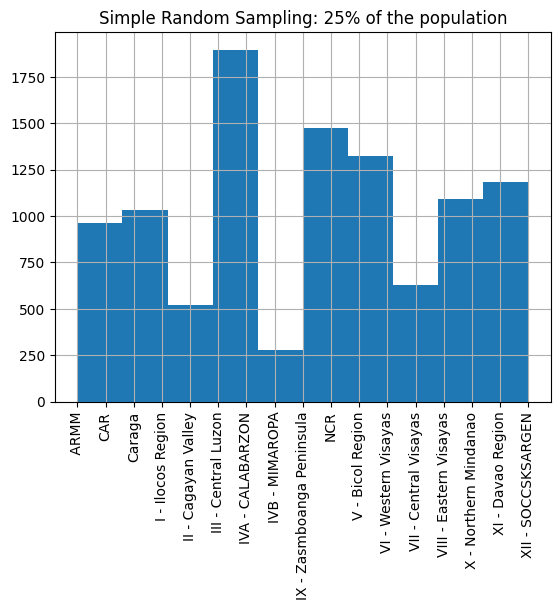

In [18]:

#* Simple Random Sampling

simple_random_data = data.sample(frac=0.25)
#display(simple_random_data.groupby('Region')['Region'].count())
simple_random_data.sort_values(by='Region')['Region'].hist()
plt.xticks(rotation=90)
plt.title('Simple Random Sampling: 25% of the population')
plt.show()

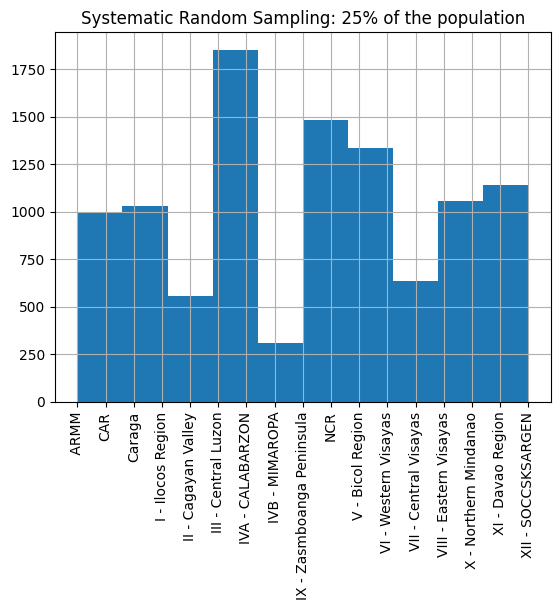

In [23]:

#* Systematic Random Sampling
sample_size = data.shape[0] * 0.25 #Sample size
pop_size = data.shape[0]
# Calculate the interval
interval = int(pop_size) // int(sample_size)
# Systematically sample 25% of the population
system_samp_data = data.iloc[::interval]

system_samp_data.sort_values(by='Region')['Region'].hist()
plt.xticks(rotation=90)
plt.title('Systematic Random Sampling: 25% of the population')
plt.show()

In [ ]:
print(f"Population mean: {data.groupby('Region')['Region'].count().mean()}")
print(f"Systematic Sampling mean: {system_samp_data.groupby('Region')['Region'].count().mean()}")

# Roughly 4 times the population mean. It is a good representation of the whole data.

Population mean: 2443.764705882353
Systematic Sampling mean: 610.9411764705883


Region
IVA - CALABARZON             0.100183
NCR                          0.099413
III - Central Luzon          0.077917
VI - Western Visayas         0.068626
VII - Central Visayas        0.061164
V - Bicol Region             0.059503
XI - Davao Region            0.058877
I - Ilocos Region            0.056518
VIII - Eastern Visayas       0.056254
 ARMM                        0.054111
II - Cagayan Valley          0.053413
XII - SOCCSKSARGEN           0.051078
X - Northern Mindanao        0.045422
IX - Zasmboanga Peninsula    0.043039
Caraga                       0.042894
CAR                          0.041522
IVB - MIMAROPA               0.030065
Name: proportion, dtype: float64


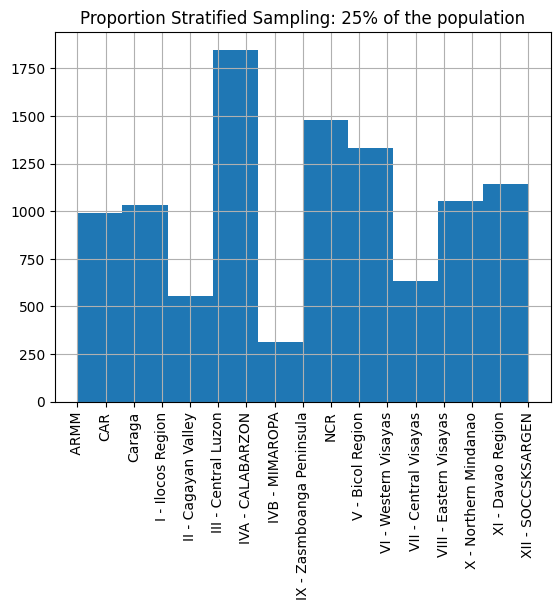

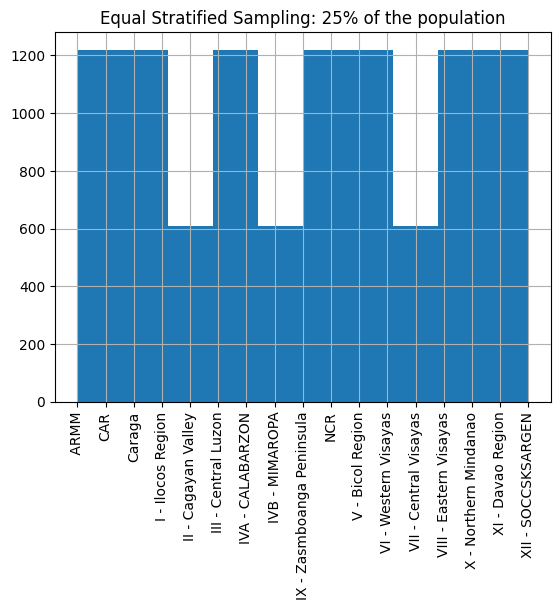

Population mean: 604967600.882353
Equal Stratified Sampling mean: 141703316.88235295


In [40]:

#* Proportion Stratified Sampling
data_counts_pop = data['Region'].value_counts(normalize=True) # Get the proportion by Region
print(data_counts_pop)
strat_samp_data = data.groupby('Region').sample(frac=0.25,random_state=2022)

strat_samp_data.sort_values(by='Region')['Region'].hist()
plt.xticks(rotation=90)
plt.title('Proportion Stratified Sampling: 25% of the population')
plt.show()

#* Equal counts stratified sampling
eq_strat_samp_data = data.groupby('Region').sample(n=(data.shape[0]//4)//17,random_state=2022)

eq_strat_samp_data.sort_values(by='Region')['Region'].hist()
plt.xticks(rotation=90)
plt.title('Equal Stratified Sampling: 25% of the population')
plt.show()

print(f"Population mean: {data.groupby('Region')['Total Household Income'].sum().mean()}")
print(f"Equal Stratified Sampling mean: {eq_strat_samp_data.groupby('Region')['Total Household Income'].sum().mean()}")

# Too high of a difference, but mean represent 25% of the population mean 

/tmp/ipykernel_260232/814013602.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Region'] = filtered_data['Region'].astype('category').cat.remove_unused_categories()
/tmp/ipykernel_260232/814013602.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clustered_data = filtered_data.groupby('Region').sample(n=400,random_state=2022)


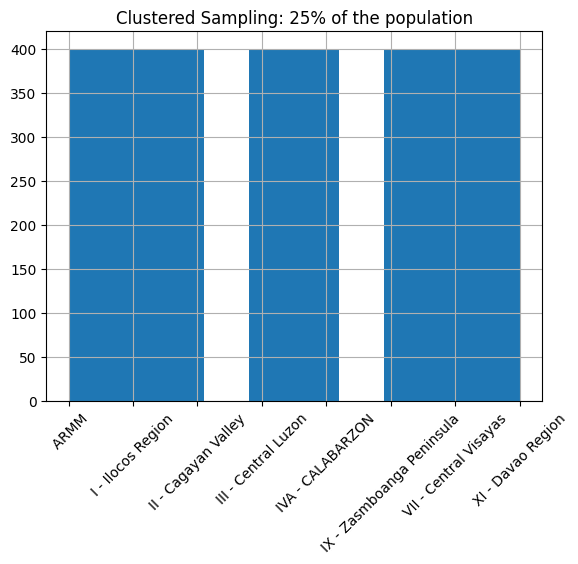

In [38]:
import random

#* Cluster Sampling

# 1. Create a list of unique Region values
region_pop = list(data['Region'].unique())

# 2. Randoply sample (17//2 = 8) Regions
region_samp = random.sample(region_pop,k=8)

# 3. Filter data for rows existing in region_samp
region_condition = data['Region'].isin(region_samp)
filtered_data = data[region_condition]

# 4. Remove categories with no rows
filtered_data['Region'] = filtered_data['Region'].astype('category').cat.remove_unused_categories()

# 5. Randomly sample 400 employees from each sampled job role
clustered_data = filtered_data.groupby('Region').sample(n=400,random_state=2022)

clustered_data.sort_values(by='Region')['Region'].hist(bins = 10)
plt.xticks(rotation=45)
plt.title('Clustered Sampling: 25% of the population')
plt.show()


## Sampling Distributions

[np.float64(238783.038), np.float64(245764.22), np.float64(244189.948), np.float64(256604.693), np.float64(247729.484), np.float64(267645.761), np.float64(241750.34), np.float64(251535.384), np.float64(233777.768), np.float64(247866.716), np.float64(248962.787), np.float64(242583.329), np.float64(235458.164), np.float64(256013.54), np.float64(237790.136), np.float64(235836.375), np.float64(243082.954), np.float64(249385.759), np.float64(255544.851), np.float64(245023.816), np.float64(265974.266), np.float64(253276.347), np.float64(249446.46), np.float64(249333.425), np.float64(233920.441), np.float64(249541.266), np.float64(245081.659), np.float64(248320.143), np.float64(243785.626), np.float64(258221.331), np.float64(241819.781), np.float64(243421.464), np.float64(242147.123), np.float64(252430.26), np.float64(264084.878), np.float64(252241.318), np.float64(249729.335), np.float64(243566.819), np.float64(253701.514), np.float64(268893.328), np.float64(255805.066), np.float64(236381.35

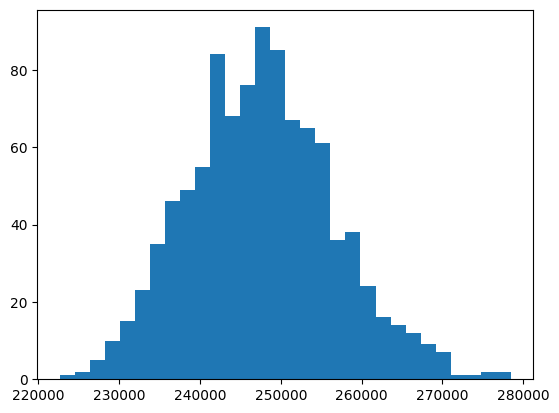

In [ ]:
# Generate 1000 sample means from 1000 samples
mean_income_array = [data.sample(n=1000)['Total Household Income'].mean() for i in range(1000)]
#print(mean_income_array)

plt.hist(mean_income_array,bins=30)
plt.show() # Normal distribution

### Central Limit Theorem
- The averages of independent samples have approximately normal distributions.
- Any distribution of the mean becomes a **normal distribution** as long as the samples are large enough.
- The width of the sampling distribution gets *narrower*

# Bootstrapping Distribution
- Sampling with replacement
- Takes a sample of data and uses it to represent the population. 
- **Bootstrapping cannot correct biases produced by simple sampling**

- **Estimated standard error** - Standard deviation of the boostrap distribution for a sample statistic.
$$\text{Pop. std} = \text{Std.Error} \times \sqrt(\text{Sample size})$$

- Bootstrapping is poor for estimating population mean
- Boostrapping Distribution is good for estimating population standard deviation
- Sampling Distribution is good for estimating population mean

# Confidence Intervals

In [ ]:
# Find the confidence interval of the Total Household Income
# Find the lower and upper limit of the confidence interval 